<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/RNA_Clasificaci%C3%B3n_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

## Importando el conjunto de datos

In [3]:
from tensorflow.keras import datasets

In [4]:
mnist = datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

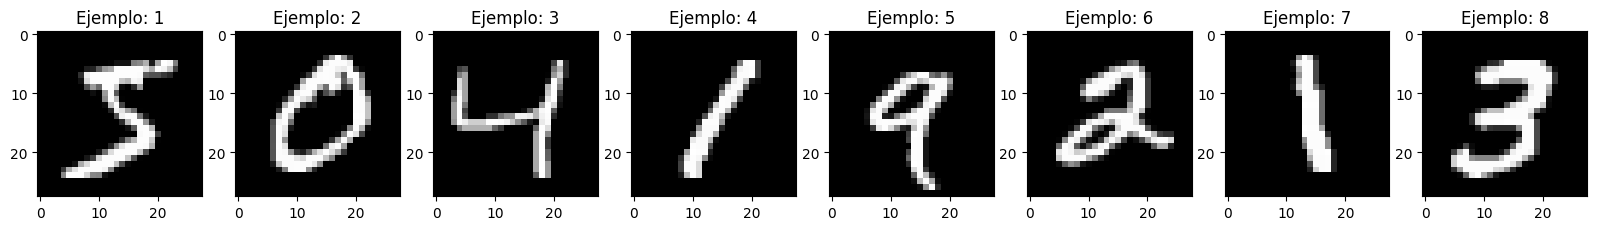

In [7]:
# Visualización de los primeros 8 ejemplos de nuestro conjunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

##2. Definición de la arquitectura de la RNA

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input

In [10]:
network = models.Sequential([
    Input(shape=(28*28,)),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [11]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hidden1 = network.layers[1]

##3. Configuración de la RNA

In [13]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

##4. Preparación del conjunto de datos

In [14]:
# Preparación de las cartacterísticas de entrada
X_train_prep = X_train.reshape((60000, 28*28))
X_train_pred = X_train_prep.astype('float32') / 255.0

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32') / 255.0

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32') / 255.0

In [15]:
# Preparación de las características de salida
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

##5. Entramiento de la RNA

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs=30,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - Precision: 0.5877 - accuracy: 0.4383 - loss: 14.7401 - val_Precision: 0.0000e+00 - val_accuracy: 0.0936 - val_loss: 2.3759
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Precision: 0.9319 - accuracy: 0.5989 - loss: 1.2949 - val_Precision: 0.0000e+00 - val_accuracy: 0.0932 - val_loss: 2.4525
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - Precision: 0.9252 - accuracy: 0.7210 - loss: 0.9617 - val_Precision: 0.0000e+00 - val_accuracy: 0.0932 - val_loss: 2.4749
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - Precision: 0.9191 - accuracy: 0.7676 - loss: 0.7954 - val_Precision: 0.0000e+00 - val_accuracy: 0.0932 - val_loss: 2.4828
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - Precision: 0.9222 - accuracy: 0.7972 - loss: 0.7085 - val_Precision: 0.0000e+00 - val_accuracy: 0.0932 - val_loss: 2.5104
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - Precision: 0.9255 - accuracy: 0.8113 - loss: 0.

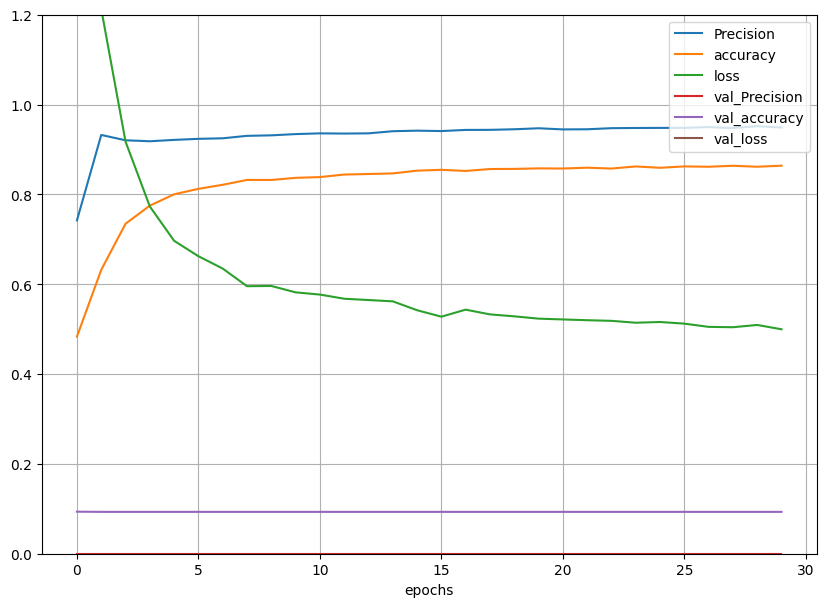

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel('epochs')
plt.show()

##6. Validación con el conjunto de datos de prueba

In [18]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.0000e+00 - accuracy: 0.1001 - loss: 2.3041


In [19]:
print('test_acc', test_acc)
print('test_prec', test_prec)

test_acc 0.10159999877214432
test_prec 0.0


##7. Predicción de nuevos ejemplos

In [20]:
X_new = X_test[34]